In [1]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import norm,chi2
from sklearn.decomposition import PCA

In [4]:
plt.style.use("default")

In [2]:
# Download 5 years of daily adjusted closing prices
stocks = ['INFY.NS', 'RELIANCE.NS', 'HDFCBANK.NS']
data = yf.download(stocks, start='2020-01-01', end='2025-01-01') [('Close')]

<ipython-input-2-897f69bdfd13>:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start='2020-01-01', end='2025-01-01') [('Close')]
[*********************100%***********************]  3 of 3 completed


In [3]:
data.head()

Ticker,HDFCBANK.NS,INFY.NS,RELIANCE.NS
Date,,,
2020-01-01,605.529419,633.151001,675.324219
2020-01-02,609.389160,631.303650,686.821167
2020-01-03,600.698853,641.013428,687.648865
2020-01-06,587.698792,634.869690,671.700745
2020-01-07,597.004822,625.460693,682.034546


In [4]:
data.tail()

Ticker,HDFCBANK.NS,INFY.NS,RELIANCE.NS
Date,,,
2024-12-24,887.059631,1854.176880,1217.885864
2024-12-26,883.433655,1852.574341,1211.710571
2024-12-27,887.133667,1861.655518,1216.192749
2024-12-30,877.094360,1851.214600,1205.883789
2024-12-31,874.603027,1825.961792,1210.614868


In [5]:
print(data.index)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='Date', length=1238, freq=None)


# EDA

<Figure size 432x288 with 0 Axes>

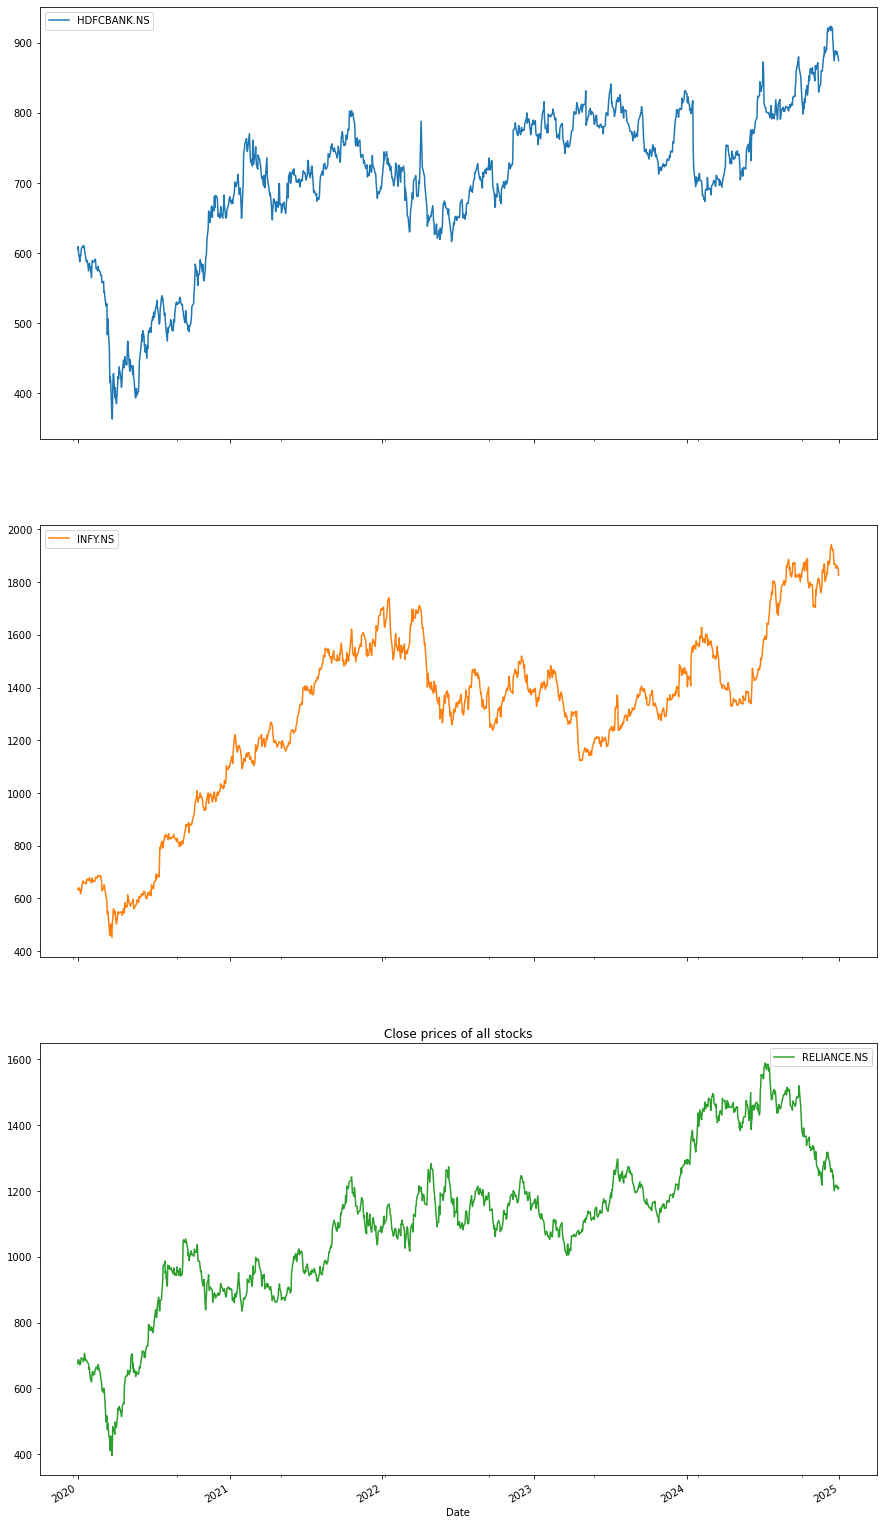

In [6]:
# Plotting daily Prices of all the stocks
plt.figure()
data.plot(subplots=True, figsize=(15,30))
plt.title("Close prices of all stocks")
plt.show()

In [7]:
# ---------------------------
# 3. COMPUTE DAILY RETURNS
# ---------------------------
# Calculate daily returns (% change)
returns = data.pct_change().dropna()
print("Returns shape:", returns.shape)
returns.head()

Returns shape: (1237, 3)


Ticker,HDFCBANK.NS,INFY.NS,RELIANCE.NS
Date,,,
2020-01-02,0.006374,-0.002918,0.017024
2020-01-03,-0.014261,0.015381,0.001205
2020-01-06,-0.021642,-0.009584,-0.023192
2020-01-07,0.015835,-0.014820,0.015385
2020-01-08,-0.002618,-0.013326,-0.007510


In [8]:
# Summary statistics
print(returns.describe())

Ticker  HDFCBANK.NS      INFY.NS  RELIANCE.NS
count   1237.000000  1237.000000  1237.000000
mean       0.000445     0.001010     0.000647
std        0.017175     0.017547     0.018729
min       -0.126069    -0.100393    -0.131539
25%       -0.007659    -0.008364    -0.008667
50%        0.000622     0.000910     0.000863
75%        0.008134     0.009984     0.008998
max        0.115996     0.120334     0.147180


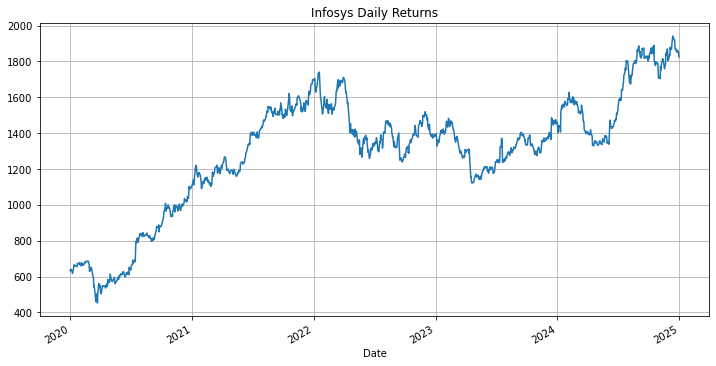

In [9]:
# Plot daily returns for each stock
data['INFY.NS'].plot(figsize=(12,6), title="Infosys Daily Returns")
plt.grid(True)
plt.show()

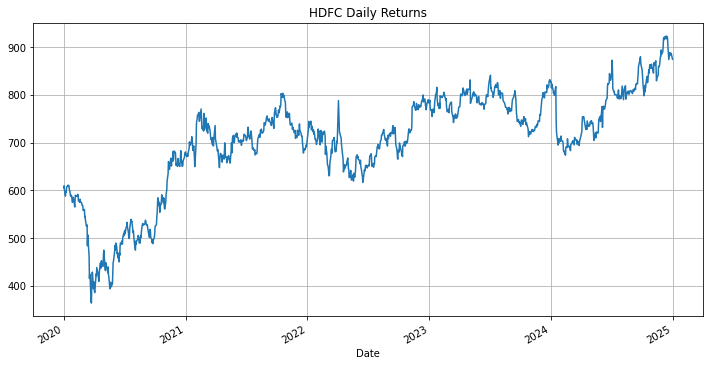

In [10]:
# Plot daily returns for each stock
data['HDFCBANK.NS'].plot(figsize=(12,6), title="HDFC Daily Returns")
plt.grid(True)
plt.show()

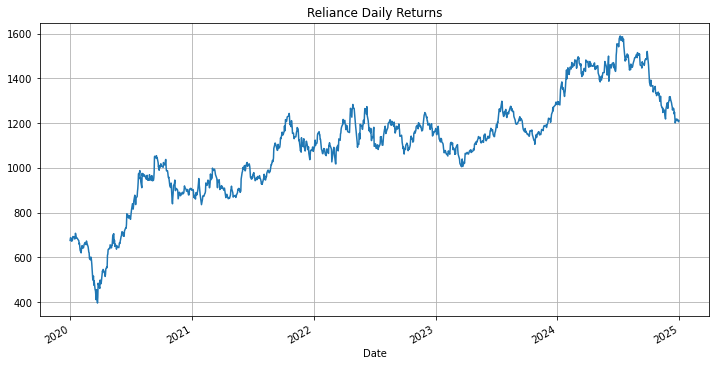

In [11]:
# Plot daily returns for each stock
data['RELIANCE.NS'].plot(figsize=(12,6), title="Reliance Daily Returns")
plt.grid(True)
plt.show()

In [12]:
# Define Portfolio Weights & Returns

# Define portfolio weights
weights = np.array([0.4, 0.35, 0.25])  # INFY, RELIANCE, HDFCBANK

# Portfolio daily returns (dot product of weights and daily returns)
#Portfolio Return=0.4⋅R INFY+0.35⋅R RELIANCE+0.25⋅R HDFCBANK

portfolio_returns = returns.dot(weights)
portfolio_returns

Date
2020-01-02    0.005785
2020-01-03   -0.000020
2020-01-06   -0.017809
2020-01-07    0.004993
2020-01-08   -0.007589
                ...   
2024-12-24   -0.003326
2024-12-26   -0.003205
2024-12-27    0.004316
2024-12-30   -0.008609
2024-12-31   -0.004930
Length: 1237, dtype: float64

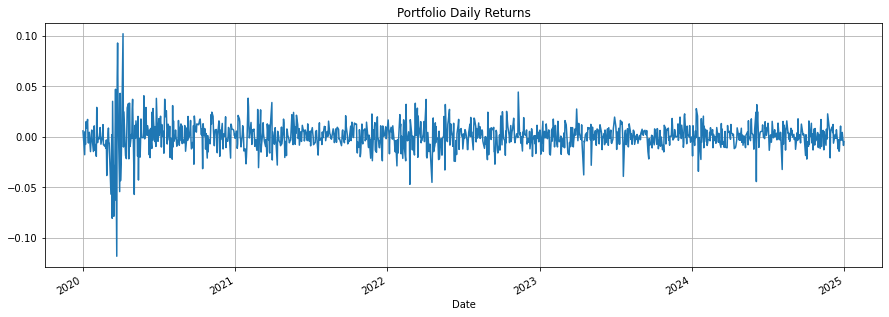

In [13]:
# Plot portfolio returns
portfolio_returns.plot(figsize=(15,5), title="Portfolio Daily Returns")
plt.grid(True)
plt.show()

# Historical VaR

In [14]:

# 95% confidence level → 5% left tail
confidence_level = 0.95
historical_var_95 = -(np.percentile(portfolio_returns, (1 - confidence_level) * 100))
print(f"Historical VaR at 95%: {historical_var_95:.2%}")

Historical VaR at 95%: 1.91%


In [15]:
# 99% confidence level → 1% left tail
confidence_level = 0.99
historical_var_99 = -(np.percentile(portfolio_returns, (1 - confidence_level) * 100))
print(f"Historical VaR at 99%: {historical_var_99:.2%}")

Historical VaR at 99%: 3.90%


# Parametric VaR 

In [16]:
# Assuming Normal Distribution
mean = portfolio_returns.mean()
Std = portfolio_returns.std()

In [17]:
z_95 = norm.ppf(1-0.95)
z_99 = norm.ppf(1-0.99)

In [18]:
z_95

-1.6448536269514722

In [19]:
parametric_var_95 = -(mean + z_95 * Std)

print(f"Parametric VaR at 95%: {parametric_var_95:.4%}")

Parametric VaR at 95%: 2.1752%


In [20]:
parametric_var_99 = -(mean + z_99 * Std)

print(f"Parametric VaR at 99%: {parametric_var_99:.4%}")

Parametric VaR at 99%: 3.1052%


# Monte Carlo Simulation

In [21]:
# Monte Carlo VaR in return space
simulated_returns = np.random.normal(mean, Std, 10000)

mc_var_95_return = -np.percentile(simulated_returns, 5)
mc_var_99_return = -np.percentile(simulated_returns, 1)

print(f"Monte Carlo VaR 95% (Return): {mc_var_95_return:.4%}")
print(f"Monte Carlo VaR 99% (Return): {mc_var_99_return:.4%}")



Monte Carlo VaR 95% (Return): 2.2446%
Monte Carlo VaR 99% (Return): 3.1088%


In [22]:
initial_value = 100000  # ₹1,00,000 portfolio

# Convert % VaR to money VaR
historical_var_money = historical_var_95 * initial_value
parametric_var_money = parametric_var_95 * initial_value
mc_var_money = mc_var_95_return * initial_value


In [23]:


print("Value at Risk (VaR) – ₹1,00,000 Portfolio")
print("==========================================")

print("\n--- 95% Confidence Level ---")
print(f"Historical VaR     : ₹{historical_var_95 * initial_value:,.2f}")
print(f"Parametric VaR     : ₹{parametric_var_95 * initial_value:,.2f}")
print(f"Monte Carlo VaR    : ₹{mc_var_95_return * initial_value:,.2f}")

print("\n--- 99% Confidence Level ---")
print(f"Historical VaR     : ₹{historical_var_99 * initial_value:,.2f}")
print(f"Parametric VaR     : ₹{parametric_var_99 * initial_value:,.2f}")
print(f"Monte Carlo VaR    : ₹{mc_var_99_return * initial_value:,.2f}")


Value at Risk (VaR) – ₹1,00,000 Portfolio

--- 95% Confidence Level ---
Historical VaR     : ₹1,906.26
Parametric VaR     : ₹2,175.20
Monte Carlo VaR    : ₹2,244.62

--- 99% Confidence Level ---
Historical VaR     : ₹3,897.59
Parametric VaR     : ₹3,105.16
Monte Carlo VaR    : ₹3,108.78


In [24]:
initial_value = 100000  # Portfolio size

print("Monte Carlo Value at Risk (VaR) Summary")
print("======================================\n")

print(f"Based on {len(simulated_returns)} Monte Carlo simulations:")

# 95% Summary
print(f"\n➡ At 95% confidence:")
print(f"   The portfolio is not expected to lose more than ₹{mc_var_95_return * initial_value:,.2f} in one day.")
print(f"   There is a 5% chance that the loss could exceed this under normal market conditions.")

# 99% Summary
print(f"\n➡ At 99% confidence:")
print(f"   The portfolio is not expected to lose more than ₹{mc_var_99_return * initial_value:,.2f} in one day.")
print(f"   There is a 1% chance that losses could be even larger in extreme events.")

print("\n(Note: Higher confidence = higher potential loss)")


Monte Carlo Value at Risk (VaR) Summary

Based on 10000 Monte Carlo simulations:

➡ At 95% confidence:
   The portfolio is not expected to lose more than ₹2,244.62 in one day.
   There is a 5% chance that the loss could exceed this under normal market conditions.

➡ At 99% confidence:
   The portfolio is not expected to lose more than ₹3,108.78 in one day.
   There is a 1% chance that losses could be even larger in extreme events.

(Note: Higher confidence = higher potential loss)


# Expected Shortfall (ES)


In [25]:
# Historical ES
def historical_es(returns, alpha=0.95, initial_value=100000):
    var_percentile = (1 - alpha) * 100
    var_cutoff = np.percentile(returns, var_percentile)  # negative return
    tail_losses = returns[returns <= var_cutoff]
    es = -tail_losses.mean() * initial_value  # convert to money
    return es


In [26]:
#Parametric ES
from scipy.stats import norm

def parametric_es(mean, Std, alpha=0.95, initial_value=100000):
    z = norm.ppf(1 - alpha)
    es = (Std * norm.pdf(z) / (1 - alpha) - mean) * initial_value
    return es


In [27]:
#Monte Carlo ES

#Just average worst 5% simulated losses:

def monte_carlo_es(simulated_returns, alpha=0.95, initial_value=100000):
    var_percentile = (1 - alpha) * 100
    cutoff = np.percentile(simulated_returns, var_percentile)
    tail = simulated_returns[simulated_returns <= cutoff]
    es = -tail.mean() * initial_value
    return es

In [28]:
initial_value = 100000

for cl in [0.95, 0.99]:
    print(f"\n--- Expected Shortfall at {int(cl*100)}% CI ---")
    print(f"Historical ES: ₹{historical_es(portfolio_returns, cl, initial_value):,.2f}")
    print(f"Parametric ES: ₹{parametric_es(mean, Std, cl, initial_value):,.2f}")
    print(f"Monte Carlo ES: ₹{monte_carlo_es(simulated_returns, cl, initial_value):,.2f}")



--- Expected Shortfall at 95% CI ---
Historical ES: ₹3,150.82
Parametric ES: ₹2,745.40
Monte Carlo ES: ₹2,786.98

--- Expected Shortfall at 99% CI ---
Historical ES: ₹5,939.65
Parametric ES: ₹3,567.57
Monte Carlo ES: ₹3,581.14


# Stress Testing
Stress testing is a way of checking how a system performs under extreme or abnormal conditions to see if it can handle unexpected pressure without failing.

A. Hypothetical Shock Scenarios

We imagine sudden crashes:

Scenario 1: –10% crash in all assets

Scenario 2: –30% big crash

Scenario 3: –50% extreme meltdown



✅ B. Historical Crisis Scenario (COVID Crash Approx)

We’ll look at:

Period around Feb–Mar 2020 (COVID crash)


In [29]:
initial_value = 100000  # ₹1,00,000 portfolio

# Take first row of prices
initial_prices = data.iloc[0]

# How many shares of each stock we hold
shares = (initial_value * weights) / initial_prices

# Daily portfolio value = sum(price * shares)
portfolio_values = (data * shares).sum(axis=1)
portfolio_values.name = "Portfolio_Value"

portfolio_values.head()


Date
2020-01-01    100000.000000
2020-01-02    100578.455002
2020-01-03    100571.779822
2020-01-06     98783.015465
2020-01-07     99260.181284
Name: Portfolio_Value, dtype: float64

In [30]:
data.head()

Ticker,HDFCBANK.NS,INFY.NS,RELIANCE.NS
Date,,,
2020-01-01,605.529419,633.151001,675.324219
2020-01-02,609.389160,631.303650,686.821167
2020-01-03,600.698853,641.013428,687.648865
2020-01-06,587.698792,634.869690,671.700745
2020-01-07,597.004822,625.460693,682.034546


# Hypothetical Shock Scenarios

We’ll apply –10%, –30%, –50% shock to latest prices

In [31]:
latest_prices = data.iloc[-1]
current_portfolio_value = (latest_prices * shares).sum()

print(f"Current portfolio value: ₹{current_portfolio_value:,.2f}")

scenarios = {
    "Mild Shock (-10%)": -0.10,
    "Severe Shock (-30%)": -0.30,
    "Extreme Shock (-50%)": -0.50,
}

print("\nHypothetical Shock Stress Test Results:")
print("----------------------------------------")

for name, shock in scenarios.items():
    shocked_prices = latest_prices * (1 + shock)
    shocked_value = (shocked_prices * shares).sum()
    loss = current_portfolio_value - shocked_value
    loss_pct = loss / current_portfolio_value
    
    print(f"{name}:")
    print(f"  New Portfolio Value : ₹{shocked_value:,.2f}")
    print(f"  Loss                : ₹{loss:,.2f} ({loss_pct:.2%})\n")


Current portfolio value: ₹203,527.97

Hypothetical Shock Stress Test Results:
----------------------------------------
Mild Shock (-10%):
  New Portfolio Value : ₹183,175.18
  Loss                : ₹20,352.80 (10.00%)

Severe Shock (-30%):
  New Portfolio Value : ₹142,469.58
  Loss                : ₹61,058.39 (30.00%)

Extreme Shock (-50%):
  New Portfolio Value : ₹101,763.99
  Loss                : ₹101,763.99 (50.00%)



# Historical COVID Stress (Feb–Mar 2020) 

In [32]:
# Filter portfolio values for 2020 (COVID year)
covid_period = portfolio_values["2020-02-01":"2020-04-30"]

covid_start_value = covid_period.iloc[0]
covid_min_value = covid_period.min()

covid_loss = covid_start_value - covid_min_value
covid_loss_pct = covid_loss/covid_start_value
print("Historical Stress Test – COVID Crash (Feb–Apr 2020)")
print("---------------------------------------------------")
print(f"Start Value (Feb 2020) : ₹{covid_start_value:,.2f}")
print(f"Minimum Value in Crash : ₹{covid_min_value:,.2f}")
print(f"Max Drawdown           : ₹{covid_loss:,.2f} ({covid_loss_pct:.2%})")



Historical Stress Test – COVID Crash (Feb–Apr 2020)
---------------------------------------------------
Start Value (Feb 2020) : ₹96,711.75
Minimum Value in Crash : ₹63,783.92
Max Drawdown           : ₹32,927.83 (34.05%)


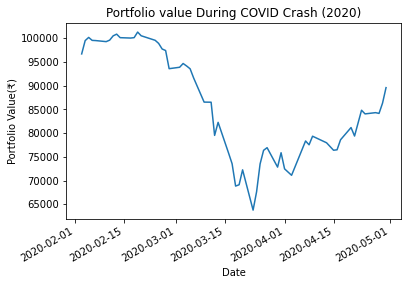

In [33]:
covid_period.plot(title='Portfolio value During COVID Crash (2020)')
plt.ylabel("Portfolio Value(₹)")
plt.show()

In [34]:
# Daily returns of each stock
returns = data.pct_change().dropna()
returns.head()

Ticker,HDFCBANK.NS,INFY.NS,RELIANCE.NS
Date,,,
2020-01-02,0.006374,-0.002918,0.017024
2020-01-03,-0.014261,0.015381,0.001205
2020-01-06,-0.021642,-0.009584,-0.023192
2020-01-07,0.015835,-0.014820,0.015385
2020-01-08,-0.002618,-0.013326,-0.007510


# PCA

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA()
pca.fit(returns)


PCA()

In [37]:
explained_var = pca.explained_variance_ratio_

print("explained variance by components:")
for i, var in enumerate(explained_var):
    print(f"PC{i+1}: {var:.2%}")

explained variance by components:
PC1: 59.43%
PC2: 22.05%
PC3: 18.52%


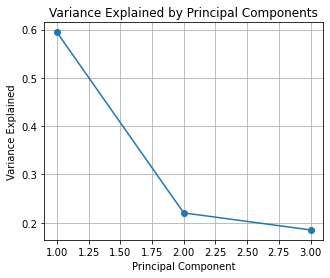

In [38]:
plt.figure(figsize=(5,4))
plt.plot(range(1, len(explained_var)+1),
         explained_var, marker='o')
plt.title("Variance Explained by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.grid(True)
plt.show()


In [39]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(returns.columns))],
    index=returns.columns
)

loadings


,PC1,PC2,PC3
Ticker,,,
HDFCBANK.NS,-0.548435,0.171969,-0.818319
INFY.NS,-0.526250,-0.831501,0.177952
RELIANCE.NS,-0.649830,0.528236,0.546523


In [41]:
#The portfolio risk is mainly driven by the broad market factor (PC1: ~59%), followed by sector divergence between technology and energy stocks (PC2: ~22%).
#Only two principal components are needed to explain ~81% of the total risk, enabling risk factor reduction for stress testing and regulatory capital modelling.

# DAILY PnL

In [42]:
portfolio_values
initial_value = 100000


In [43]:
# Daily returns of portfolio
portfolio_returns = portfolio_values.pct_change().dropna()

# Daily PnL
daily_pnl = portfolio_returns * initial_value

daily_pnl.head()


Date
2020-01-02     578.455002
2020-01-03      -6.636789
2020-01-06   -1778.594712
2020-01-07     483.044395
2020-01-08    -759.215467
Name: Portfolio_Value, dtype: float64

# SIGNAL BACKTEST (BREACH SERIES)

In [45]:
historical_var_money = historical_var_95 * initial_value
parametric_var_money = parametric_var_95 * initial_value
mc_var_money = mc_var_95_return * initial_value

In [46]:
historical_var_money

1906.2585874443112

In [48]:
# BREACH 
breaches = daily_pnl < -historical_var_money
breaches = breaches.astype(int)   # convert True/False → 1/0

breaches.head()


Date
2020-01-02    0
2020-01-03    0
2020-01-06    0
2020-01-07    0
2020-01-08    0
Name: Portfolio_Value, dtype: int32

In [52]:
breaches.describe()

count    1237.000000
mean        0.050930
std         0.219943
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Portfolio_Value, dtype: float64

In [53]:
Number_breaches = breaches.sum()

In [54]:
Number_breaches

63

In [55]:
total_days = len(breaches)

In [56]:
total_days

1237

In [58]:
print("Total Breaches:", Number_breaches)
print("Out of:", total_days)

Total Breaches: 63
Out of: 1237


### Signal Backtesting — Conclusion

The signal backtest compares the portfolio’s daily PnL with the 95% VaR threshold to identify VaR breaches. Across 1237 trading days, the portfolio showed 63 VaR breaches.

The expected number of breaches for a 95% VaR model is:

Expected Breaches = 1237 * 0.05 = 62


Since the actual breaches (63) are very close to the expected number (≈62), the VaR model demonstrates good unconditional coverage at the raw frequency level.

This indicates that, based purely on the count of failures, the VaR estimates are reasonably aligned with actual portfolio losses.

A more rigorous statistical evaluation of breach frequency is performed next using the Kupiec Unconditional Coverage Test.


In [59]:
import numpy as np
from scipy.stats import chi2

def kupiec_test(num_failures, total_obs, alpha=0.95):
    """
    Kupiec Unconditional Coverage Test
    num_failures : number of VaR breaches
    total_obs    : total number of observations
    alpha        : VaR confidence level (0.95 for 95%)
    """
    # expected failure probability
    p = 1 - alpha   # for 95% VaR → 0.05

    x = num_failures
    n = total_obs

    # Likelihood Ratio (LR) statistic
    LR_uc = -2 * (
        np.log(((1-p)**(n-x)) * (p**x)) -
        np.log(((1 - x/n)**(n-x)) * ((x/n)**x))
    )

    # p-value from Chi-square(1)
    p_value = 1 - chi2.cdf(LR_uc, df=1)

    return LR_uc, p_value


# Run test
LR_value, kupiec_pvalue = kupiec_test(63, 1237, 0.95)

print("Kupiec LR Statistic:", LR_value)
print("Kupiec p-value:", kupiec_pvalue)


Kupiec LR Statistic: 0.022376827211644468
Kupiec p-value: 0.8810889972540316


### Kupiec Test — Conclusion

The Kupiec Unconditional Coverage Test evaluates whether the number of observed VaR breaches matches the expected failure rate of a 95% VaR model.

For 63 breaches observed over 1237 trading days, the test yields:

- **LR (Unconditional Coverage): 0.0224**
- **p-value: 0.8811**

Since the p-value is far greater than the 0.05 significance level, we fail to reject the null hypothesis of correct coverage. This indicates that the VaR model's breach frequency is statistically consistent with the expected 5% tail probability.

In other words, the model demonstrates **accurate unconditional coverage** and passes the Kupiec backtest.


# Christoffersen Independence Test

In [60]:
import numpy as np
from scipy.stats import chi2

# breaches: pandas Series or numpy array of 0/1 indexed by date, length n
# ensure it's ordered by date
b = breaches.values.astype(int)  # or np.array(breaches)

# Build transition counts
N00 = N01 = N10 = N11 = 0
for i in range(len(b)-1):
    prev, curr = b[i], b[i+1]
    if prev == 0 and curr == 0:
        N00 += 1
    elif prev == 0 and curr == 1:
        N01 += 1
    elif prev == 1 and curr == 0:
        N10 += 1
    elif prev == 1 and curr == 1:
        N11 += 1

# Totals
total_transitions = N00 + N01 + N10 + N11
x = N01 + N11   # total breaches observed (excluding first day edge-case)
# overall p (unconditional)
p = (N01 + N11) / total_transitions

# conditional probs
p01 = N01 / (N00 + N01) if (N00 + N01) > 0 else 0.0
p11 = N11 / (N10 + N11) if (N10 + N11) > 0 else 0.0

# Log-likelihoods (use logs to avoid underflow)
# L1 (Markov / alternative)
ll1 = (N00 * np.log(1 - p01) if N00>0 else 0.0) + (N01 * np.log(p01) if N01>0 else 0.0) \
    + (N10 * np.log(1 - p11) if N10>0 else 0.0) + (N11 * np.log(p11) if N11>0 else 0.0)

# L0 (independence / null, p = overall)
ll0 = ((N00 + N10) * np.log(1 - p) if (N00 + N10)>0 else 0.0) + ((N01 + N11) * np.log(p) if (N01 + N11)>0 else 0.0)

LR_ind = -2 * (ll0 - ll1)
pvalue_ind = 1 - chi2.cdf(LR_ind, df=1)

# Print transition table and results
print("Transition counts (N00, N01, N10, N11):", N00, N01, N10, N11)
print("Total transitions:", total_transitions)
print("p01 (P(breach|no-breach)):", p01)
print("p11 (P(breach|breach)):", p11)
print("Overall p:", p)
print("\nChristoffersen Independence Test:")
print("LR_ind:", LR_ind)
print("p-value (independence):", pvalue_ind)

# If you want the combined test LR = LR_uc + LR_ind (Kupiec LR_uc should be computed earlier)
# LR_combined = LR_uc + LR_ind
# pvalue_combined = 1 - chi2.cdf(LR_combined, df=2)


Transition counts (N00, N01, N10, N11): 1115 58 58 5
Total transitions: 1236
p01 (P(breach|no-breach)): 0.0494458653026428
p11 (P(breach|breach)): 0.07936507936507936
Overall p: 0.050970873786407765

Christoffersen Independence Test:
LR_ind: 0.9613689020421248
p-value (independence): 0.3268422247355437


### Christoffersen Independence Test — Conclusion

The Christoffersen test checks whether VaR breaches occur independently over time or in clusters (which would indicate model failure during stress periods).

Transition counts:
- N00 (0 → 0): 1115  
- N01 (0 → 1): 58  
- N10 (1 → 0): 58  
- N11 (1 → 1): 5  

Conditional breach probabilities:
- p01 (breach after no-breach) = 0.04945  
- p11 (breach after breach) = 0.07936  

Test statistics:
- LR statistic = 0.9614  
- p-value = 0.3268  

Interpretation:
Since the p-value (0.3268) is much greater than the 0.05 significance level, we do **not** reject the hypothesis of independence. This means the VaR breaches do not exhibit meaningful clustering.

**Conclusion:**  
The model passes the Christoffersen Independence Test. The timing of the VaR breaches is consistent with an appropriately calibrated VaR model.


# Basel Traffic Light Classification

In [61]:
# Extract last 250 days
pnl_250 = daily_pnl[-250:]

# VaR threshold (same for all days)
var_threshold = -historical_var_money

# Compute breaches in last 250 days
breaches_250 = (pnl_250 < var_threshold).astype(int)

num_breaches_250 = breaches_250.sum()

print("Breaches (last 250 days):", num_breaches_250)


Breaches (last 250 days): 9


In [62]:
def basel_zone(num_breaches):
    if num_breaches <= 4:
        return "GREEN ZONE (Model Accepted)"
    elif 5 <= num_breaches <= 9:
        return "YELLOW ZONE (Increased Capital Multiplier)"
    else:
        return "RED ZONE (Model Rejected)"
        
zone = basel_zone(num_breaches_250)
print("Basel Traffic Light Zone:", zone)


Basel Traffic Light Zone: YELLOW ZONE (Increased Capital Multiplier)


In [63]:
pnl_250 


Date
2023-12-26    -205.530916
2023-12-27    1120.298185
2023-12-28      95.007245
2023-12-29    -694.354534
2024-01-01      97.781598
                 ...     
2024-12-24    -433.024548
2024-12-26    -270.014948
2024-12-27     443.695991
2024-12-30    -785.323174
2024-12-31    -676.082323
Name: Portfolio_Value, Length: 250, dtype: float64

### Basel Traffic Light Test — Conclusion

The last 250 trading days included elevated market volatility driven by geopolitical events (wars), commodity price spikes (gold), and policy uncertainties. During this period, the model recorded 9 VaR exceptions.

According to Basel rules:
- 0–4 exceptions → Green Zone  
- 5–9 exceptions → Yellow Zone  
- 10 or more → Red Zone  

Therefore, the VaR model falls in the **Yellow Zone**. This does not indicate model failure; instead, it reflects heightened market volatility. The model remains acceptable, but Basel requires the application of an increased capital multiplier to account for the higher risk regime.
